In [2]:
# Импортируем библиотеки
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from IPython.display import display, HTML

# 2.1. Сбор данных

## 2.1.1. Выбор тикеров и загрузка данных

In [5]:
# Выбираем тикеры для портфеля
tickers = [
    # Акции
    'AAPL', 'MSFT', 'GOOGL', 'TSLA', 'NVDA',  # Технологии
    'AMZN', 'WMT',                            # Потребительский сектор
    'JPM', 'BAC',                             # Финансовый сектор
    # Облигации
    'TLT', 'IEF', 'LQD',                      # Долгосрочные, среднесрочные, корпоративные облигации
    # ETF
    'SPY', 'QQQ',                             # Широкий рынок
    'EFA', 'EEM',                             # Международные рынки
    # Товары
    'GLD', 'USO',                             # Золото, нефть
    # Криптовалюты
    'BTC-USD', 'ETH-USD'                      # Биткоин, Эфириум
]

In [6]:
# Указываем временной интервал для анализа
start_date = "2018-01-01"
end_date = "2023-01-01"

In [7]:
# Скачиваем данные из Yahoo Finance с помощью библиотеки yfinance
data = yf.download(tickers, start=start_date, end=end_date)['Adj Close']
data.head()

[*********************100%***********************]  20 of 20 completed


Ticker,AAPL,AMZN,BAC,BTC-USD,EEM,EFA,ETH-USD,GLD,GOOGL,IEF,JPM,LQD,MSFT,NVDA,QQQ,SPY,TLT,TSLA,USO,WMT
Date,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,NaN,NaN,NaN,13657.200195,NaN,NaN,772.640991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 00:00:00+00:00,40.524353,59.450500,25.350626,14982.099609,41.639668,58.376003,884.443970,125.150002,53.527954,91.191505,88.566345,95.604103,79.633530,4.929880,151.418182,240.801529,105.456871,21.368668,96.559998,29.255869
2018-01-03 00:00:00+00:00,40.517288,60.209999,25.265842,15201.000000,42.038639,58.656231,962.719971,124.820000,54.441196,91.286865,88.656586,95.778366,80.004089,5.254336,152.889450,242.324631,105.961143,21.150000,98.720001,29.511061
2018-01-04 00:00:00+00:00,40.705494,60.479500,25.596502,15599.200195,42.246788,59.299076,980.921997,125.459999,54.652668,91.243469,89.926651,95.746674,80.708260,5.282032,153.156921,243.346024,105.944305,20.974667,98.959999,29.537771
2018-01-05 00:00:00+00:00,41.168930,61.457001,25.715202,17429.500000,42.611061,59.628731,997.719971,125.330002,55.377377,91.130844,89.349342,95.714996,81.708916,5.326793,154.695160,244.967682,105.641777,21.105333,98.480003,29.712843


In [8]:
# Проверяем на пропущенные значения
missing_values_before = data.isnull().sum()
missing_values_before

Ticker
AAPL       567
AMZN       567
BAC        567
BTC-USD      0
EEM        567
EFA        567
ETH-USD      0
GLD        567
GOOGL      567
IEF        567
JPM        567
LQD        567
MSFT       567
NVDA       567
QQQ        567
SPY        567
TLT        567
TSLA       567
USO        567
WMT        567
dtype: int64

## 2.1.2. Очистка данных

In [10]:
# Заполняем пропущенные значения линейной интерполяцией по времени
cleaned_data = data.interpolate(method='time')
cleaned_data

Ticker,AAPL,AMZN,BAC,BTC-USD,EEM,EFA,ETH-USD,GLD,GOOGL,IEF,JPM,LQD,MSFT,NVDA,QQQ,SPY,TLT,TSLA,USO,WMT
Date,,,,,,,,,,,,,,,,,,,,
2018-01-01 00:00:00+00:00,NaN,NaN,NaN,13657.200195,NaN,NaN,772.640991,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-02 00:00:00+00:00,40.524353,59.450500,25.350626,14982.099609,41.639668,58.376003,884.443970,125.150002,53.527954,91.191505,88.566345,95.604103,79.633530,4.929880,151.418182,240.801529,105.456871,21.368668,96.559998,29.255869
2018-01-03 00:00:00+00:00,40.517288,60.209999,25.265842,15201.000000,42.038639,58.656231,962.719971,124.820000,54.441196,91.286865,88.656586,95.778366,80.004089,5.254336,152.889450,242.324631,105.961143,21.150000,98.720001,29.511061
2018-01-04 00:00:00+00:00,40.705494,60.479500,25.596502,15599.200195,42.246788,59.299076,980.921997,125.459999,54.652668,91.243469,89.926651,95.746674,80.708260,5.282032,153.156921,243.346024,105.944305,20.974667,98.959999,29.537771
2018-01-05 00:00:00+00:00,41.168930,61.457001,25.715202,17429.500000,42.611061,59.628731,997.719971,125.330002,55.377377,91.130844,89.349342,95.714996,81.708916,5.326793,154.695160,244.967682,105.641777,21.105333,98.480003,29.712843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27 00:00:00+00:00,128.676834,83.040001,30.764835,16717.173828,37.099197,62.901535,1212.791626,168.669998,87.174141,90.214973,124.943161,97.398865,233.134033,14.110737,260.644531,372.180359,93.320358,109.099998,69.529999,46.760620
2022-12-28 00:00:00+00:00,124.728371,81.820000,30.991816,16552.572266,36.557606,62.234295,1189.986084,167.910004,85.807526,89.998695,125.625999,97.094711,230.743225,14.025798,257.203278,367.555023,92.770554,112.709999,68.580002,45.941227
2022-12-29 00:00:00+00:00,128.261215,84.180000,31.341732,16642.341797,37.166897,63.216091,1201.595337,168.850006,88.231522,90.440659,126.346794,97.785980,237.118622,14.592386,263.472717,374.171082,93.823608,121.820000,68.529999,46.220856


In [11]:
# Удаляем оставшиеся строки с пропущенными значениями (если они есть после интерполяции)
cleaned_data = cleaned_data.dropna()
cleaned_data

Ticker,AAPL,AMZN,BAC,BTC-USD,EEM,EFA,ETH-USD,GLD,GOOGL,IEF,JPM,LQD,MSFT,NVDA,QQQ,SPY,TLT,TSLA,USO,WMT
Date,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00+00:00,40.524353,59.450500,25.350626,14982.099609,41.639668,58.376003,884.443970,125.150002,53.527954,91.191505,88.566345,95.604103,79.633530,4.929880,151.418182,240.801529,105.456871,21.368668,96.559998,29.255869
2018-01-03 00:00:00+00:00,40.517288,60.209999,25.265842,15201.000000,42.038639,58.656231,962.719971,124.820000,54.441196,91.286865,88.656586,95.778366,80.004089,5.254336,152.889450,242.324631,105.961143,21.150000,98.720001,29.511061
2018-01-04 00:00:00+00:00,40.705494,60.479500,25.596502,15599.200195,42.246788,59.299076,980.921997,125.459999,54.652668,91.243469,89.926651,95.746674,80.708260,5.282032,153.156921,243.346024,105.944305,20.974667,98.959999,29.537771
2018-01-05 00:00:00+00:00,41.168930,61.457001,25.715202,17429.500000,42.611061,59.628731,997.719971,125.330002,55.377377,91.130844,89.349342,95.714996,81.708916,5.326793,154.695160,244.967682,105.641777,21.105333,98.480003,29.712843
2018-01-06 00:00:00+00:00,41.117961,61.752500,25.655851,17527.000000,42.611061,59.623243,1041.680054,125.323334,55.442548,91.116391,89.393331,95.712362,81.736712,5.381199,154.895767,245.116999,105.619372,21.546000,98.666669,29.859234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-27 00:00:00+00:00,128.676834,83.040001,30.764835,16717.173828,37.099197,62.901535,1212.791626,168.669998,87.174141,90.214973,124.943161,97.398865,233.134033,14.110737,260.644531,372.180359,93.320358,109.099998,69.529999,46.760620
2022-12-28 00:00:00+00:00,124.728371,81.820000,30.991816,16552.572266,36.557606,62.234295,1189.986084,167.910004,85.807526,89.998695,125.625999,97.094711,230.743225,14.025798,257.203278,367.555023,92.770554,112.709999,68.580002,45.941227
2022-12-29 00:00:00+00:00,128.261215,84.180000,31.341732,16642.341797,37.166897,63.216091,1201.595337,168.850006,88.231522,90.440659,126.346794,97.785980,237.118622,14.592386,263.472717,374.171082,93.823608,121.820000,68.529999,46.220856


In [12]:
# Приведение данных к единой частоте (ежедневной)
# В данном случае данные уже представлены в ежедневной частоте, но можно убедиться:
cleaned_data = cleaned_data.asfreq('B')  # B - Business Days (рабочие дни)
cleaned_data

Ticker,AAPL,AMZN,BAC,BTC-USD,EEM,EFA,ETH-USD,GLD,GOOGL,IEF,JPM,LQD,MSFT,NVDA,QQQ,SPY,TLT,TSLA,USO,WMT
Date,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00+00:00,40.524353,59.450500,25.350626,14982.099609,41.639668,58.376003,884.443970,125.150002,53.527954,91.191505,88.566345,95.604103,79.633530,4.929880,151.418182,240.801529,105.456871,21.368668,96.559998,29.255869
2018-01-03 00:00:00+00:00,40.517288,60.209999,25.265842,15201.000000,42.038639,58.656231,962.719971,124.820000,54.441196,91.286865,88.656586,95.778366,80.004089,5.254336,152.889450,242.324631,105.961143,21.150000,98.720001,29.511061
2018-01-04 00:00:00+00:00,40.705494,60.479500,25.596502,15599.200195,42.246788,59.299076,980.921997,125.459999,54.652668,91.243469,89.926651,95.746674,80.708260,5.282032,153.156921,243.346024,105.944305,20.974667,98.959999,29.537771
2018-01-05 00:00:00+00:00,41.168930,61.457001,25.715202,17429.500000,42.611061,59.628731,997.719971,125.330002,55.377377,91.130844,89.349342,95.714996,81.708916,5.326793,154.695160,244.967682,105.641777,21.105333,98.480003,29.712843
2018-01-08 00:00:00+00:00,41.016022,62.343498,25.537148,15170.099609,42.611061,59.612267,1148.530029,125.309998,55.572891,91.087486,89.481308,95.707092,81.792305,5.490010,155.296982,245.415634,105.574562,22.427334,99.040001,30.152016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+00:00,129.129574,83.592501,30.750649,16919.804688,36.963799,62.877706,1226.974365,168.317497,87.633005,90.405394,124.834091,97.716837,233.569386,14.381790,261.579018,372.548737,93.790968,112.612499,69.477499,46.757368
2022-12-27 00:00:00+00:00,128.676834,83.040001,30.764835,16717.173828,37.099197,62.901535,1212.791626,168.669998,87.174141,90.214973,124.943161,97.398865,233.134033,14.110737,260.644531,372.180359,93.320358,109.099998,69.529999,46.760620
2022-12-28 00:00:00+00:00,124.728371,81.820000,30.991816,16552.572266,36.557606,62.234295,1189.986084,167.910004,85.807526,89.998695,125.625999,97.094711,230.743225,14.025798,257.203278,367.555023,92.770554,112.709999,68.580002,45.941227


In [13]:
# Выделение корректного временного интервала
# Для примера ограничиваем данные 2018-01-01 по 2023-01-01
cleaned_data = cleaned_data.loc["2018-01-01":"2023-01-01"]
cleaned_data

Ticker,AAPL,AMZN,BAC,BTC-USD,EEM,EFA,ETH-USD,GLD,GOOGL,IEF,JPM,LQD,MSFT,NVDA,QQQ,SPY,TLT,TSLA,USO,WMT
Date,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00+00:00,40.524353,59.450500,25.350626,14982.099609,41.639668,58.376003,884.443970,125.150002,53.527954,91.191505,88.566345,95.604103,79.633530,4.929880,151.418182,240.801529,105.456871,21.368668,96.559998,29.255869
2018-01-03 00:00:00+00:00,40.517288,60.209999,25.265842,15201.000000,42.038639,58.656231,962.719971,124.820000,54.441196,91.286865,88.656586,95.778366,80.004089,5.254336,152.889450,242.324631,105.961143,21.150000,98.720001,29.511061
2018-01-04 00:00:00+00:00,40.705494,60.479500,25.596502,15599.200195,42.246788,59.299076,980.921997,125.459999,54.652668,91.243469,89.926651,95.746674,80.708260,5.282032,153.156921,243.346024,105.944305,20.974667,98.959999,29.537771
2018-01-05 00:00:00+00:00,41.168930,61.457001,25.715202,17429.500000,42.611061,59.628731,997.719971,125.330002,55.377377,91.130844,89.349342,95.714996,81.708916,5.326793,154.695160,244.967682,105.641777,21.105333,98.480003,29.712843
2018-01-08 00:00:00+00:00,41.016022,62.343498,25.537148,15170.099609,42.611061,59.612267,1148.530029,125.309998,55.572891,91.087486,89.481308,95.707092,81.792305,5.490010,155.296982,245.415634,105.574562,22.427334,99.040001,30.152016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+00:00,129.129574,83.592501,30.750649,16919.804688,36.963799,62.877706,1226.974365,168.317497,87.633005,90.405394,124.834091,97.716837,233.569386,14.381790,261.579018,372.548737,93.790968,112.612499,69.477499,46.757368
2022-12-27 00:00:00+00:00,128.676834,83.040001,30.764835,16717.173828,37.099197,62.901535,1212.791626,168.669998,87.174141,90.214973,124.943161,97.398865,233.134033,14.110737,260.644531,372.180359,93.320358,109.099998,69.529999,46.760620
2022-12-28 00:00:00+00:00,124.728371,81.820000,30.991816,16552.572266,36.557606,62.234295,1189.986084,167.910004,85.807526,89.998695,125.625999,97.094711,230.743225,14.025798,257.203278,367.555023,92.770554,112.709999,68.580002,45.941227


In [14]:
# Проверяем оставшиеся пропущенные значения
missing_values_after = cleaned_data.isnull().sum()
missing_values_after

Ticker
AAPL       0
AMZN       0
BAC        0
BTC-USD    0
EEM        0
EFA        0
ETH-USD    0
GLD        0
GOOGL      0
IEF        0
JPM        0
LQD        0
MSFT       0
NVDA       0
QQQ        0
SPY        0
TLT        0
TSLA       0
USO        0
WMT        0
dtype: int64

In [15]:
# Отображаем статистику очистки
missing_values_summary = pd.DataFrame({
    "До очистки": missing_values_before,
    "После очистки": missing_values_after
})
missing_values_summary

,До очистки,После очистки
Ticker,,
AAPL,567,0
AMZN,567,0
BAC,567,0
BTC-USD,0,0
EEM,567,0
EFA,567,0
ETH-USD,0,0
GLD,567,0
GOOGL,567,0


In [16]:
# Создаем словарь с полными названиями тикеров на русском языке
ticker_names = {
    'AAPL': 'Apple Inc.',
    'MSFT': 'Microsoft Corporation',
    'GOOGL': 'Alphabet Inc.',
    'TSLA': 'Tesla, Inc.',
    'NVDA': 'NVIDIA Corporation',
    'AMZN': 'Amazon.com, Inc.',
    'WMT': 'Walmart Inc.',
    'JPM': 'JPMorgan Chase & Co.',
    'BAC': 'Bank of America Corporation',
    'TLT': 'Долгосрочные казначейские облигации США (ETF)',
    'IEF': 'Среднесрочные казначейские облигации США (ETF)',
    'LQD': 'Корпоративные облигации инвестиционного уровня (ETF)',
    'SPY': 'Индекс S&P 500 (ETF)',
    'QQQ': 'NASDAQ 100 (ETF)',
    'EFA': 'Международные рынки развитых стран (ETF)',
    'EEM': 'Развивающиеся рынки (ETF)',
    'GLD': 'Золото (ETF)',
    'USO': 'Нефть (ETF)',
    'BTC-USD': 'Биткоин',
    'ETH-USD': 'Эфириум'
}

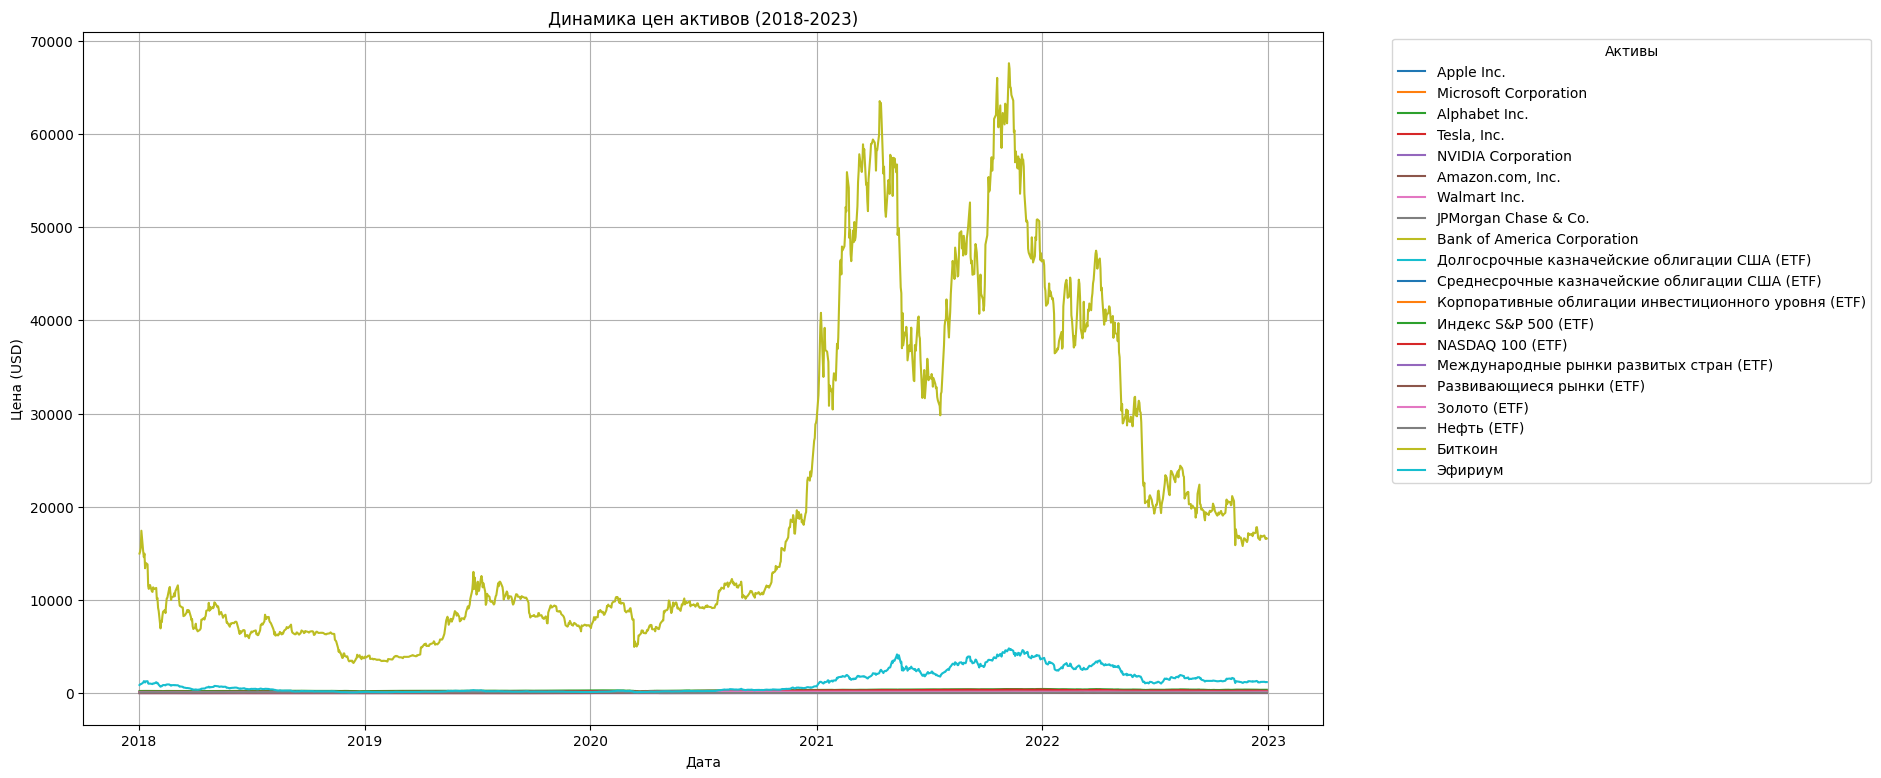

In [17]:
# Визуализация динамики цен для всех активов с русскими названиями
plt.figure(figsize=(16, 9))
for ticker in tickers:
    full_name = ticker_names.get(ticker, ticker)  # Получаем русское название, если оно есть
    plt.plot(cleaned_data.index, cleaned_data[ticker], label=full_name)
plt.title('Динамика цен активов (2018-2023)')
plt.xlabel('Дата')
plt.ylabel('Цена (USD)')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Активы')
plt.grid()
plt.show()

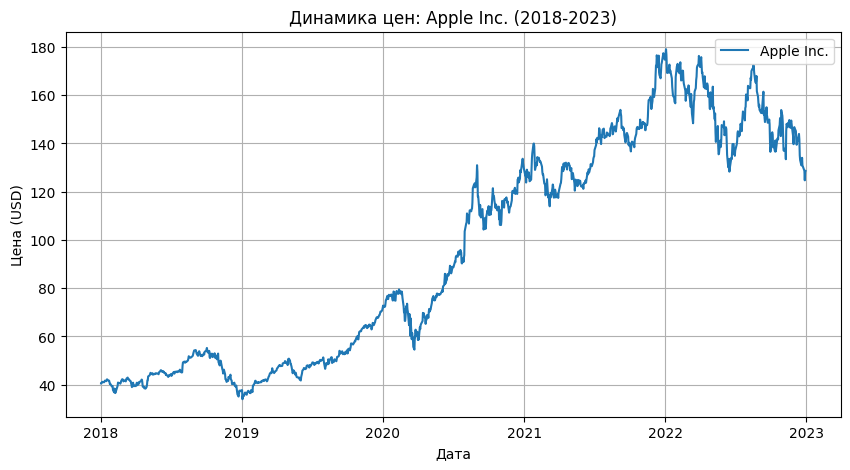

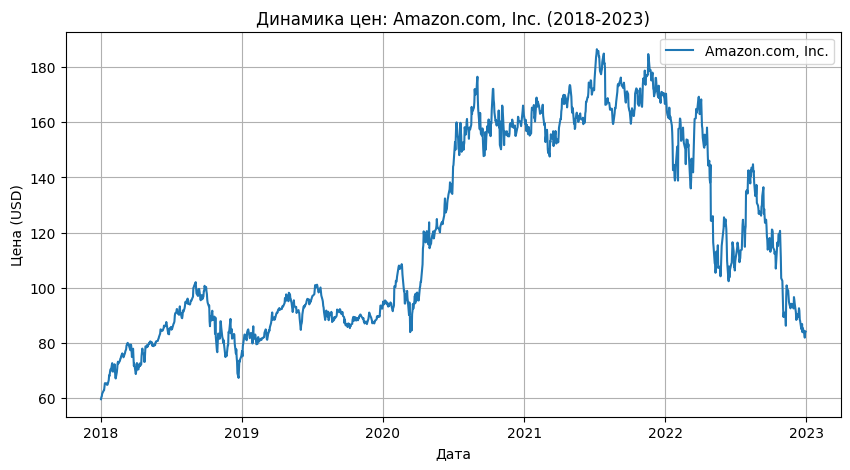

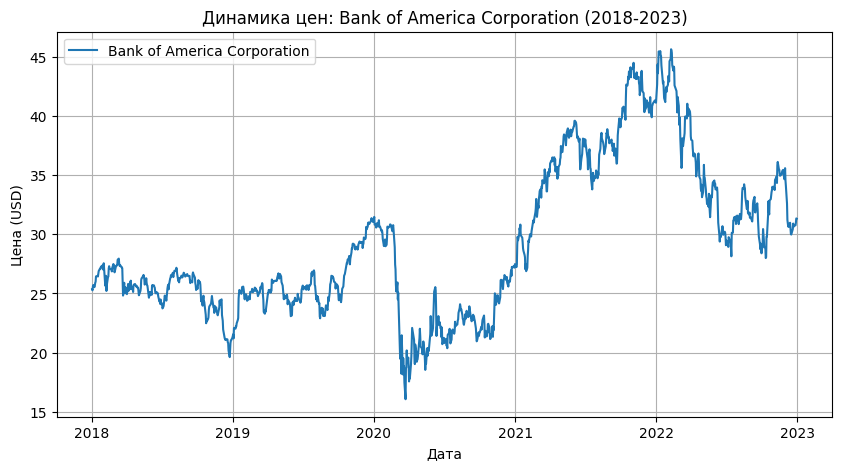

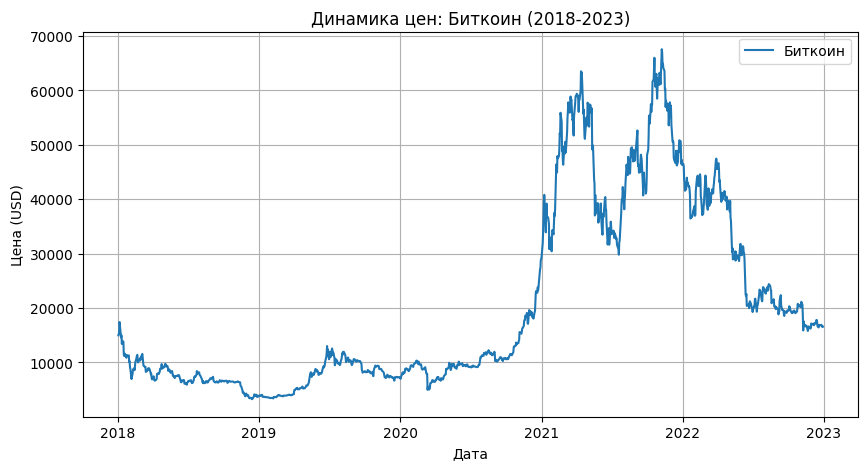

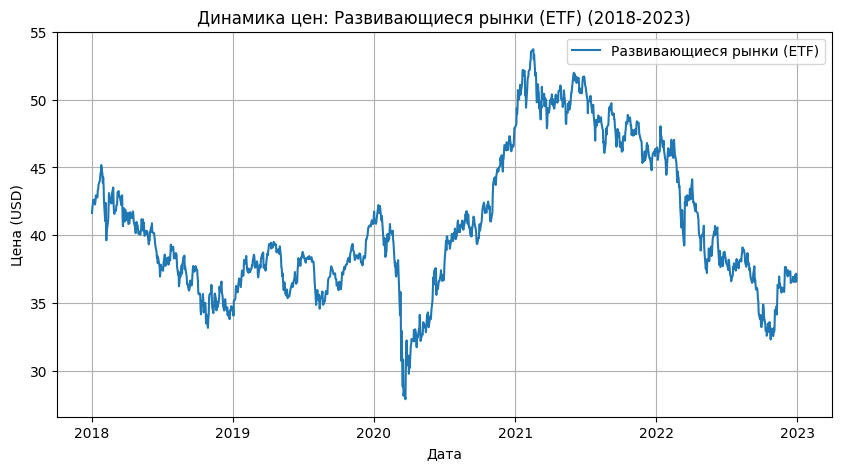

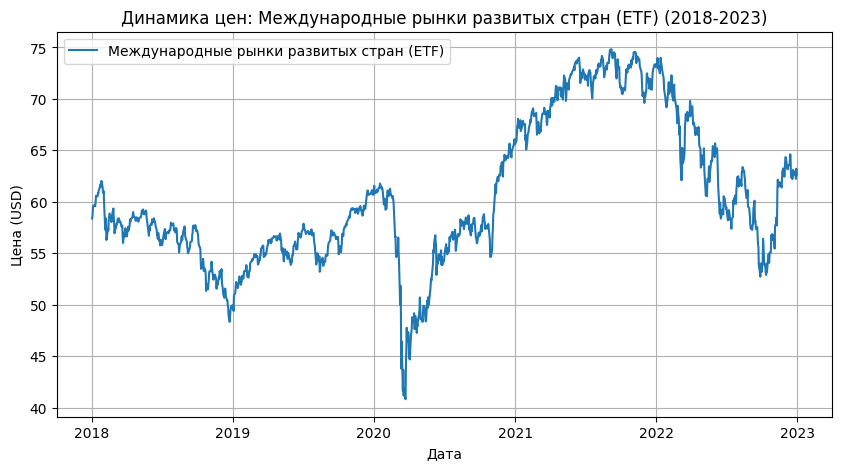

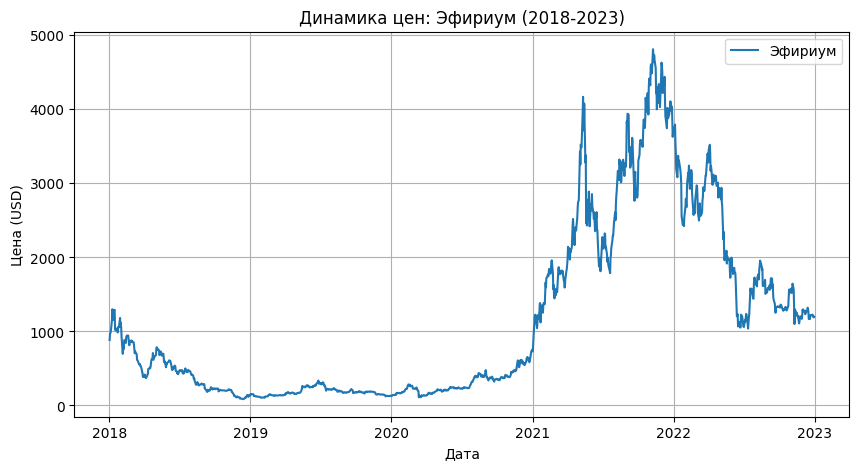

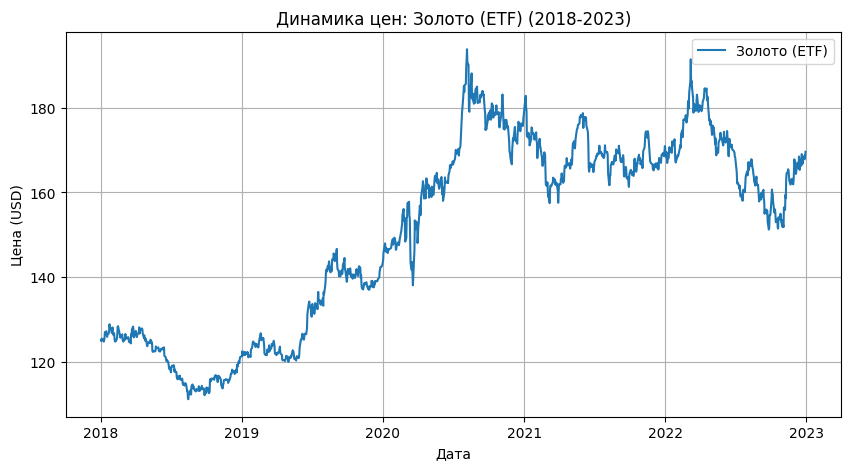

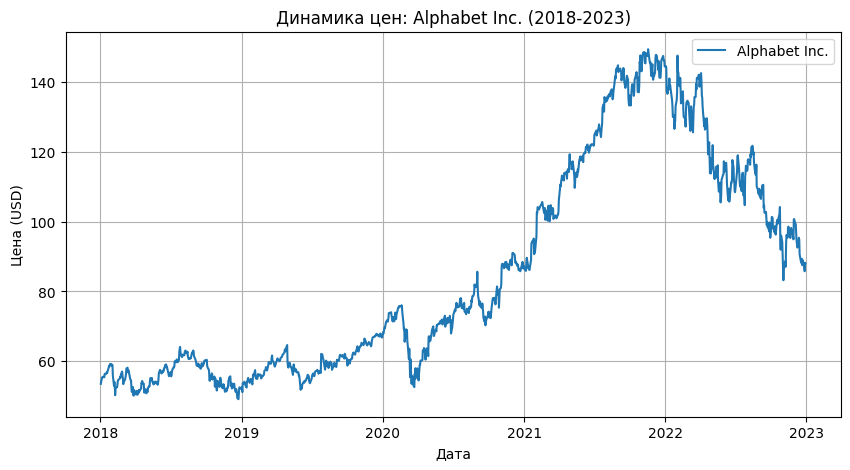

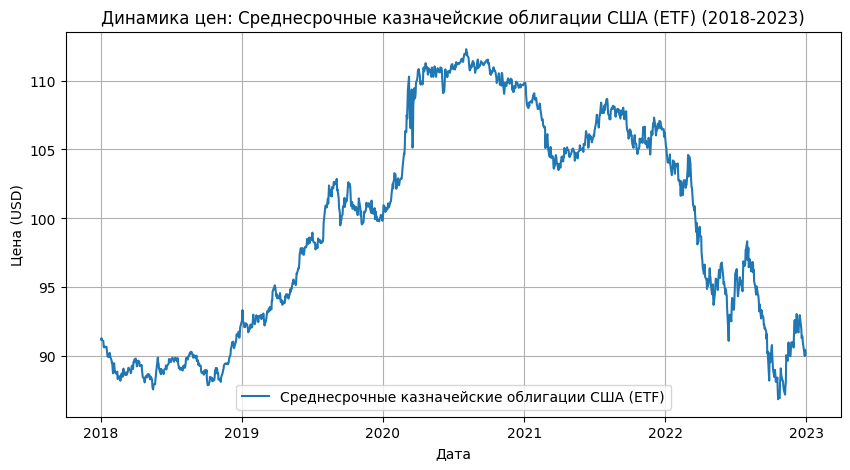

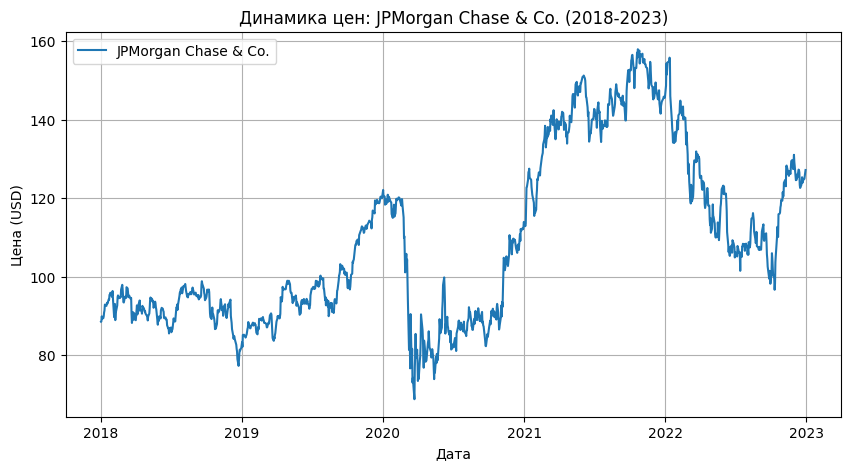

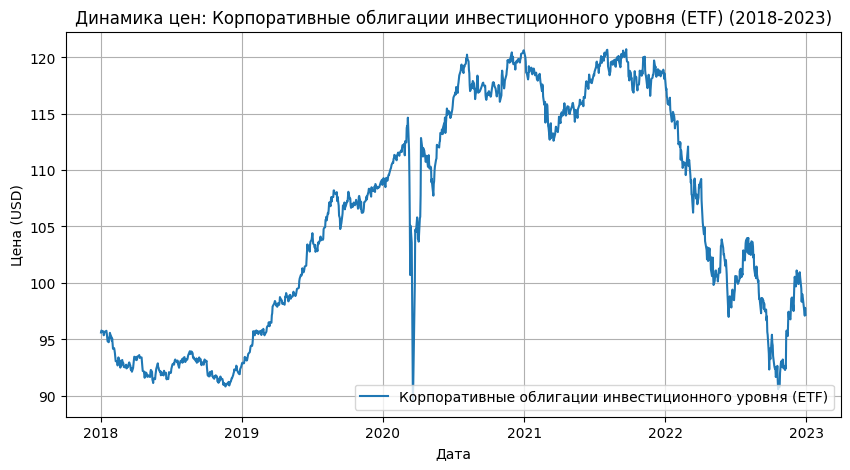

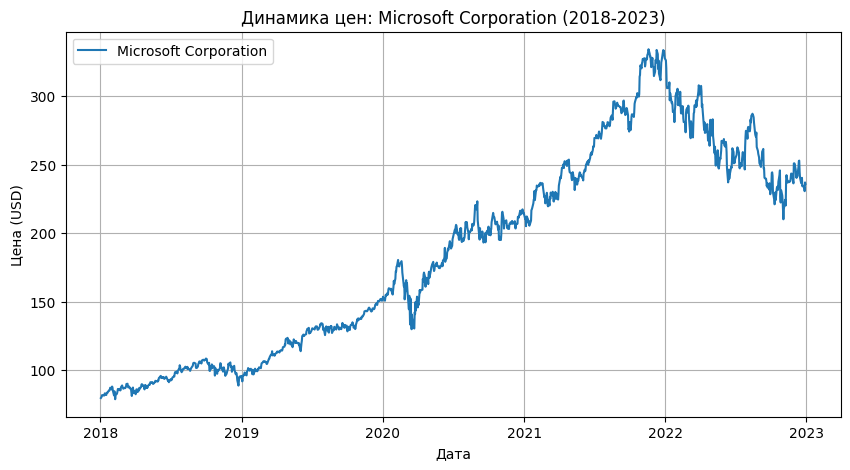

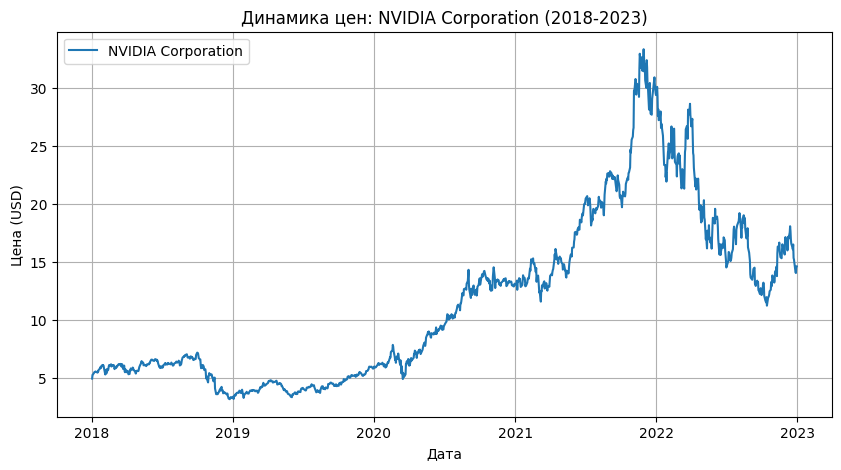

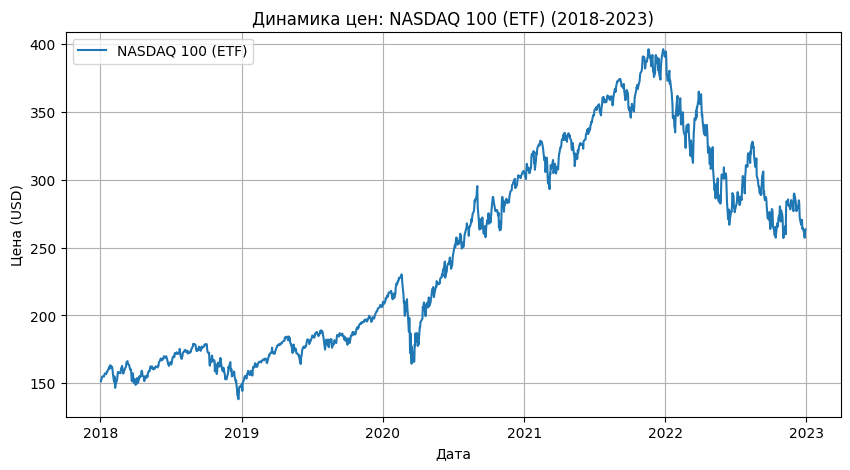

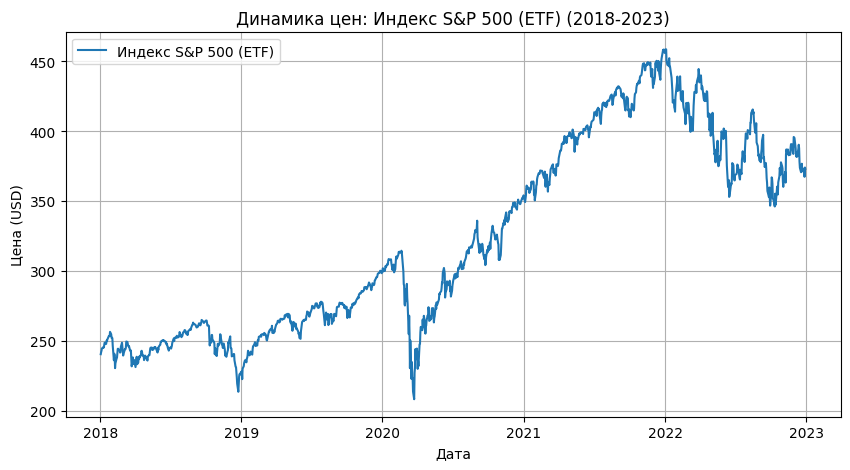

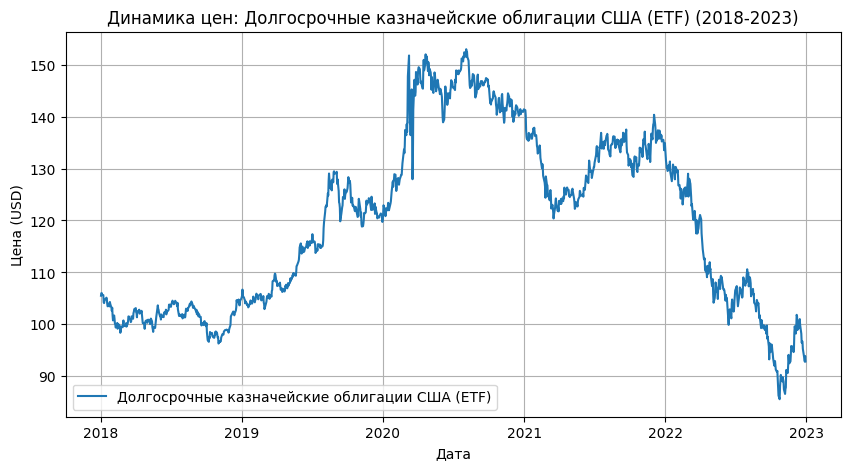

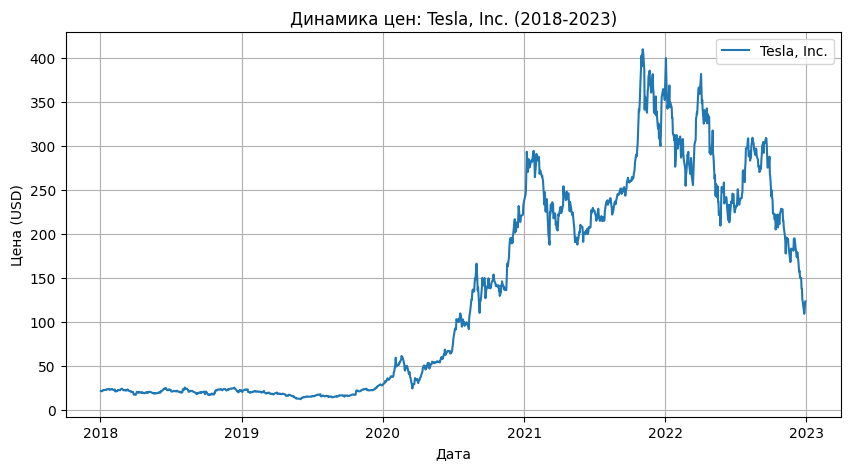

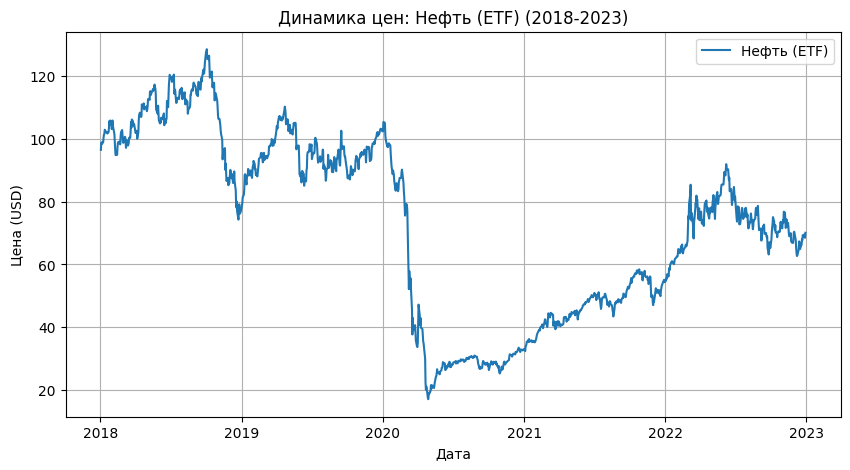

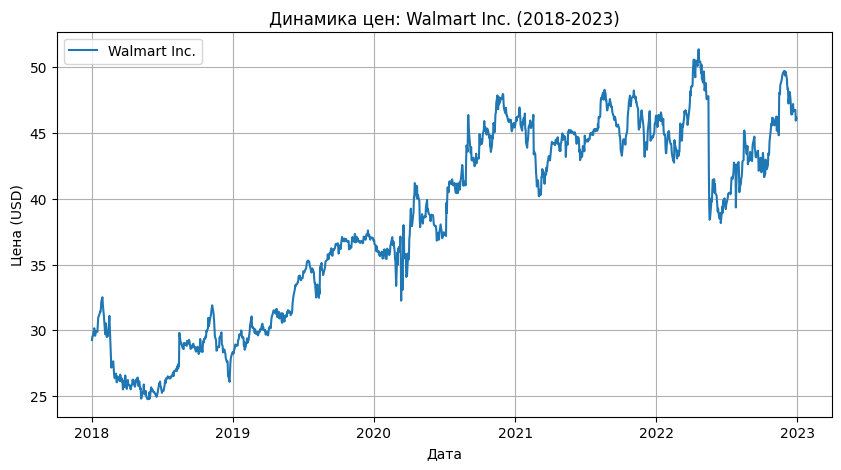

In [18]:
# Визуализация динамики цен для каждого тикера с полными названиями
for ticker in cleaned_data.columns:
    full_name = ticker_names.get(ticker, ticker)  # Получаем название на русском, если оно указано
    plt.figure(figsize=(10, 5))
    plt.plot(cleaned_data.index, cleaned_data[ticker], label=full_name)
    plt.title(f'Динамика цен: {full_name} (2018-2023)')
    plt.xlabel('Дата')
    plt.ylabel('Цена (USD)')
    plt.legend()
    plt.grid()
    plt.show()

## 2.1.3. Подготовка временных рядов (доходность и волатильность)

In [20]:
# Вычисление простой доходности
simple_returns = cleaned_data.pct_change().dropna()
simple_returns

Ticker,AAPL,AMZN,BAC,BTC-USD,EEM,EFA,ETH-USD,GLD,GOOGL,IEF,JPM,LQD,MSFT,NVDA,QQQ,SPY,TLT,TSLA,USO,WMT
Date,,,,,,,,,,,,,,,,,,,,
2018-01-03 00:00:00+00:00,-0.000174,0.012775,-0.003344,0.014611,0.009582,0.004800,0.088503,-0.002637,0.017061,0.001046,0.001019,0.001823,0.004653,0.065814,0.009717,0.006325,0.004782,-0.010233,0.022370,0.008723
2018-01-04 00:00:00+00:00,0.004645,0.004476,0.013087,0.026196,0.004951,0.010960,0.018907,0.005127,0.003884,-0.000475,0.014326,-0.000331,0.008802,0.005271,0.001749,0.004215,-0.000159,-0.008290,0.002431,0.000905
2018-01-05 00:00:00+00:00,0.011385,0.016163,0.004637,0.117333,0.008623,0.005559,0.017125,-0.001036,0.013260,-0.001234,-0.006420,-0.000331,0.012398,0.008474,0.010044,0.006664,-0.002856,0.006230,-0.004850,0.005927
2018-01-08 00:00:00+00:00,-0.003714,0.014425,-0.006924,-0.129631,0.000000,-0.000276,0.151155,-0.000160,0.003531,-0.000476,0.001477,-0.000083,0.001021,0.030641,0.003890,0.001829,-0.000636,0.062638,0.005686,0.014781
2018-01-09 00:00:00+00:00,-0.000115,0.004676,0.004980,-0.037884,-0.001628,0.001106,0.131655,-0.004628,-0.001274,-0.004757,0.005069,-0.003640,-0.000680,-0.000270,0.000062,0.002264,-0.013372,-0.008085,0.015347,-0.012006
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+00:00,-0.010409,-0.019443,0.001386,0.007314,0.011111,0.001138,0.005585,0.006323,-0.015466,-0.006279,0.002628,-0.009668,-0.005561,-0.053515,-0.010604,-0.002958,-0.014830,-0.085566,0.002272,0.000209
2022-12-27 00:00:00+00:00,-0.003506,-0.006609,0.000461,-0.011976,0.003663,0.000379,-0.011559,0.002094,-0.005236,-0.002106,0.000874,-0.003254,-0.001864,-0.018847,-0.003572,-0.000989,-0.005018,-0.031191,0.000756,0.000070
2022-12-28 00:00:00+00:00,-0.030685,-0.014692,0.007378,-0.009846,-0.014598,-0.010608,-0.018804,-0.004506,-0.015677,-0.002397,0.005465,-0.003123,-0.010255,-0.006019,-0.013203,-0.012428,-0.005892,0.033089,-0.013663,-0.017523


In [21]:
# Вычисление логарифмической доходности
log_returns = np.log(cleaned_data / cleaned_data.shift(1)).dropna()
log_returns

Ticker,AAPL,AMZN,BAC,BTC-USD,EEM,EFA,ETH-USD,GLD,GOOGL,IEF,JPM,LQD,MSFT,NVDA,QQQ,SPY,TLT,TSLA,USO,WMT
Date,,,,,,,,,,,,,,,,,,,,
2018-01-03 00:00:00+00:00,-0.000174,0.012694,-0.003350,0.014505,0.009536,0.004789,0.084803,-0.002640,0.016917,0.001045,0.001018,0.001821,0.004643,0.063739,0.009670,0.006305,0.004770,-0.010286,0.022123,0.008685
2018-01-04 00:00:00+00:00,0.004634,0.004466,0.013002,0.025858,0.004939,0.010900,0.018730,0.005114,0.003877,-0.000475,0.014224,-0.000331,0.008763,0.005257,0.001748,0.004206,-0.000159,-0.008325,0.002428,0.000905
2018-01-05 00:00:00+00:00,0.011321,0.016033,0.004627,0.110945,0.008586,0.005544,0.016980,-0.001037,0.013173,-0.001235,-0.006440,-0.000331,0.012322,0.008439,0.009993,0.006642,-0.002860,0.006210,-0.004862,0.005910
2018-01-08 00:00:00+00:00,-0.003721,0.014322,-0.006948,-0.138838,0.000000,-0.000276,0.140766,-0.000160,0.003524,-0.000476,0.001476,-0.000083,0.001020,0.030181,0.003883,0.001827,-0.000636,0.060755,0.005670,0.014672
2018-01-09 00:00:00+00:00,-0.000115,0.004665,0.004968,-0.038620,-0.001630,0.001105,0.123681,-0.004639,-0.001275,-0.004768,0.005056,-0.003647,-0.000680,-0.000270,0.000062,0.002261,-0.013463,-0.008118,0.015231,-0.012079
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-26 00:00:00+00:00,-0.010463,-0.019634,0.001385,0.007287,0.011050,0.001138,0.005570,0.006303,-0.015587,-0.006299,0.002625,-0.009715,-0.005576,-0.055000,-0.010660,-0.002962,-0.014941,-0.089450,0.002269,0.000209
2022-12-27 00:00:00+00:00,-0.003512,-0.006631,0.000461,-0.012048,0.003656,0.000379,-0.011626,0.002092,-0.005250,-0.002109,0.000873,-0.003259,-0.001866,-0.019027,-0.003579,-0.000989,-0.005030,-0.031688,0.000755,0.000070
2022-12-28 00:00:00+00:00,-0.031166,-0.014801,0.007351,-0.009895,-0.014706,-0.010664,-0.018983,-0.004516,-0.015801,-0.002400,0.005450,-0.003128,-0.010308,-0.006038,-0.013291,-0.012506,-0.005909,0.032553,-0.013757,-0.017678


In [22]:
# Вычисление годовой волатильности
# Волатильность рассчитывается как стандартное отклонение доходности, умноженное на sqrt(252) (252 торговых дня в году)
annual_volatility = log_returns.std() * np.sqrt(252)
annual_volatility

Ticker
AAPL       0.326587
AMZN       0.347808
BAC        0.345381
BTC-USD    0.726743
EEM        0.228361
EFA        0.194812
ETH-USD    0.957705
GLD        0.140213
GOOGL      0.306338
IEF        0.065886
JPM        0.312333
LQD        0.099539
MSFT       0.303164
NVDA       0.510132
QQQ        0.256151
SPY        0.211217
TLT        0.157292
TSLA       0.633648
USO        0.440456
WMT        0.227544
dtype: float64

# 2.2. Построение модели портфеля

In [24]:
# Средняя годовая доходность
annual_returns = log_returns.mean() * 252

# Ковариационная матрица годовых доходностей
cov_matrix = log_returns.cov() * 252

In [25]:
annual_returns_df = pd.DataFrame({
    "Название": [ticker_names[ticker] for ticker in tickers],
    "Среднегодовая доходность": annual_returns
})

annual_returns_df

,Название,Среднегодовая доходность
Ticker,,
AAPL,Apple Inc.,0.223306
AMZN,Microsoft Corporation,0.066853
BAC,Alphabet Inc.,0.040912
BTC-USD,"Tesla, Inc.",0.019863
EEM,NVIDIA Corporation,-0.024663
EFA,"Amazon.com, Inc.",0.013412
ETH-USD,Walmart Inc.,0.058886
GLD,JPMorgan Chase & Co.,0.058826
GOOGL,Bank of America Corporation,0.096172


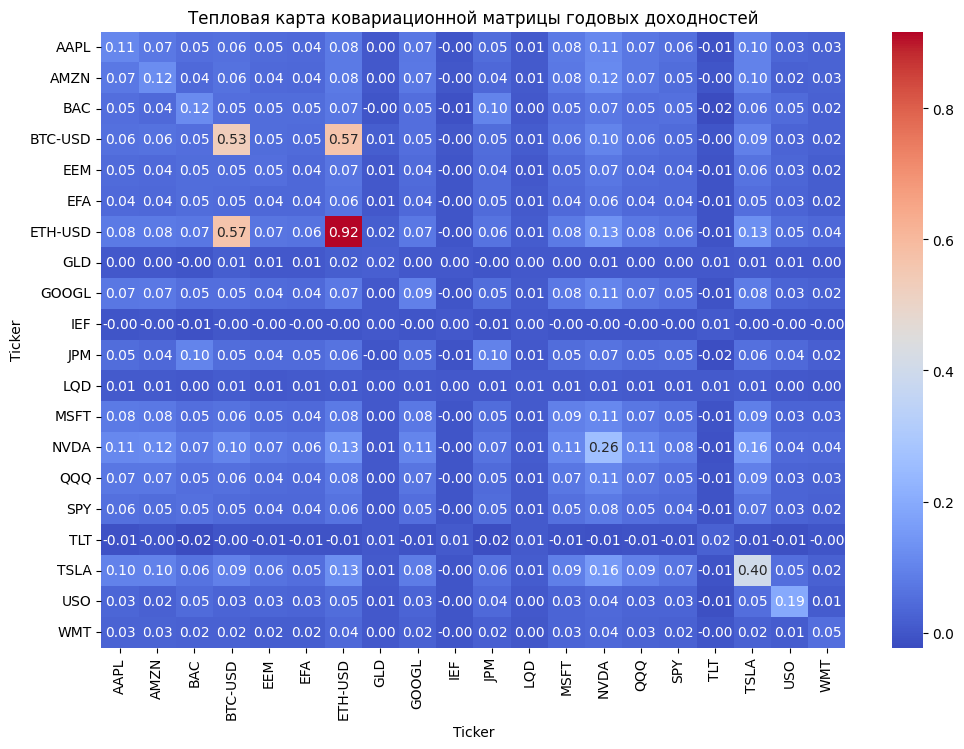

In [26]:
# Построение тепловой карты ковариации
plt.figure(figsize=(12, 8))
sns.heatmap(cov_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта ковариационной матрицы годовых доходностей')
plt.show()

In [27]:
# Случайное распределение весов портфеля
weights = np.random.random(len(tickers))
weights /= np.sum(weights)  # Нормализация весов

# Проверка: сумма весов должна равняться 1 
np.sum(weights)

1.0

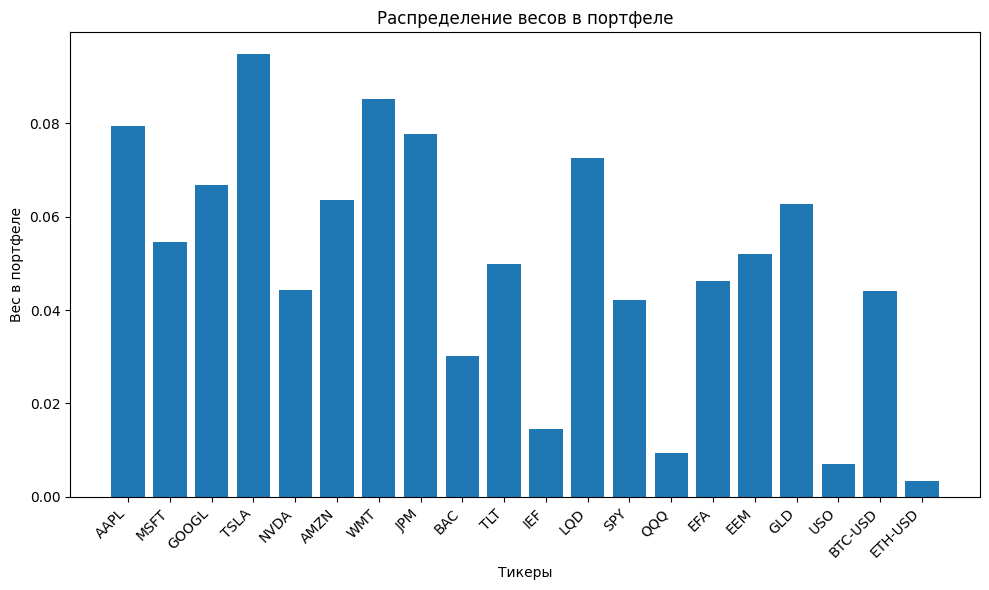

In [29]:
# Построение графика распределения весов портфеля
plt.figure(figsize=(10, 6))
plt.bar(tickers, weights)
plt.xlabel('Тикеры')
plt.ylabel('Вес в портфеле')
plt.title('Распределение весов в портфеле')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [30]:
#Названия каждого тикера
# Преобразование словаря в DataFrame
ticker_names_df = pd.DataFrame(list(ticker_names.items()), columns=['Тикер', 'Название'])

# Просмотр результата
ticker_names_df

,Тикер,Название
0,AAPL,Apple Inc.
1,MSFT,Microsoft Corporation
2,GOOGL,Alphabet Inc.
3,TSLA,"Tesla, Inc."
4,NVDA,NVIDIA Corporation
5,AMZN,"Amazon.com, Inc."
6,WMT,Walmart Inc.
7,JPM,JPMorgan Chase & Co.
8,BAC,Bank of America Corporation
9,TLT,Долгосрочные казначейские облигации США (ETF)


In [31]:
# Доходность портфеля
portfolio_return = np.dot(weights, annual_returns)

# Волатильность портфеля
portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))

# Коэффициент Шарпа (предположим, безрисковая ставка равна 0)
sharpe_ratio = portfolio_return / portfolio_volatility

print(f"Коэффициент Шарпа: {round(sharpe_ratio, 3)}")

Коэффициент Шарпа: 0.256


# 2.3. Реализация Monte Carlo Simulation

In [33]:
# Количество случайных портфелей
num_portfolios = 10000

# Массивы для хранения результатов
results = np.zeros((3, num_portfolios))
weights_record = []

for i in range(num_portfolios):
    # Генерация случайных весов
    weights = np.random.random(len(tickers))
    weights /= np.sum(weights)
    
    # Запись весов
    weights_record.append(weights)
    
    # Расчет характеристик
    portfolio_return = np.dot(weights, annual_returns)
    portfolio_volatility = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    sharpe_ratio = portfolio_return / portfolio_volatility
    
    # Сохранение результатов
    results[0, i] = portfolio_return
    results[1, i] = portfolio_volatility
    results[2, i] = sharpe_ratio

# Преобразование в DataFrame
results_df = pd.DataFrame({
    "Доходность": results[0],
    "Риск (волатильность)": results[1],
    "Коэффициент Шарпа": results[2]
})

In [34]:
results_df.head(5)

,Доходность,Риск (волатильность),Коэффициент Шарпа
0,0.085978,0.207509,0.414332
1,0.096026,0.223742,0.429184
2,0.061171,0.204489,0.299141
3,0.074617,0.225745,0.330537
4,0.066848,0.225396,0.296580


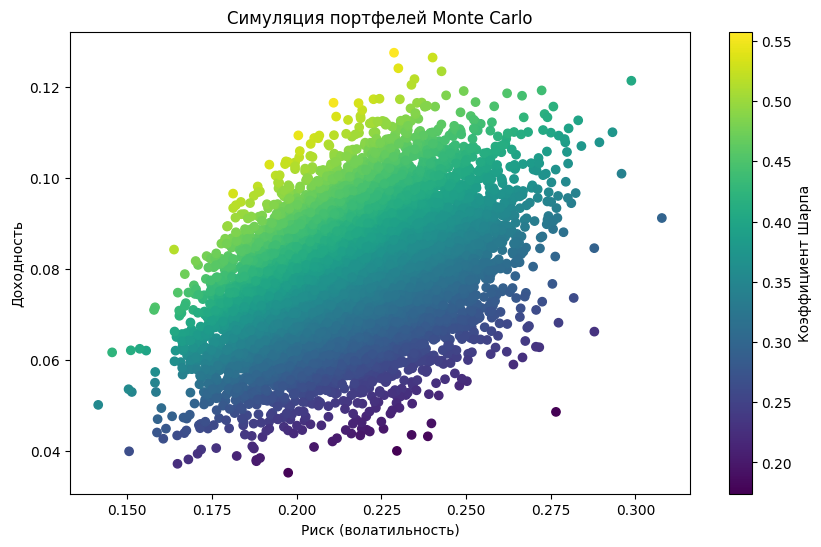

In [35]:
plt.figure(figsize=(10, 6))
plt.scatter(results[1, :], results[0, :], c=results[2, :], cmap='viridis')
plt.colorbar(label="Коэффициент Шарпа")
plt.xlabel("Риск (волатильность)")
plt.ylabel("Доходность")
plt.title("Симуляция портфелей Monte Carlo")
plt.show()

Расчёт VaR и CVaR:
- VaR — максимальный убыток, который может быть понесен за заданный период времени с определенной вероятностью.
- CVaR — ожидаемая величина убытков при условии, что они превышают VaR.

In [37]:
# 5%-ный Value at Risk
VaR = np.percentile(results[0, :], 5)

# Conditional VaR (средняя доходность ниже VaR)
CVaR = results[0, results[0, :] < VaR].mean()

var_cvar_df = pd.DataFrame.from_dict({'VaR': VaR,
                                      'CVaR': CVaR},
                                      orient='index',
                                      columns=['Значение'])

var_cvar_df

,Значение
VaR,0.057848
CVaR,0.052706


# 2.4. Анализ результатов

**Поиск портфеля с максимальным коэффициентом Шарпа:**

In [40]:
# Поиск индекса портфеля с максимальным коэффициентом Шарпа
max_sharpe_idx = results[2].argmax()

# Извлечение весов портфеля
optimal_weights = weights_record[max_sharpe_idx]

# Формирование DataFrame с весами активов и их полными названиями
optimal_portfolio_df = pd.DataFrame({
    "Тикер": tickers,
    "Название": [ticker_names[ticker] for ticker in tickers],
    "Вес в портфеле": optimal_weights
})

# Добавление характеристик портфеля
optimal_portfolio = {
    "Доходность": results[0, max_sharpe_idx],
    "Риск (волатильность)": results[1, max_sharpe_idx],
    "Коэффициент Шарпа": results[2, max_sharpe_idx]
}

In [41]:
# Преобразуем в DataFrame для удобного отображения
portfolio_summary_df = pd.DataFrame.from_dict(optimal_portfolio, orient='index', columns=['Значение'])

# Создаем HTML для отображения слева и справа
html = f"""
<div style="display: flex; justify-content: space-between;">
    <div style="width: 60%; padding-right: 20px;">
        <h3>Состав портфеля</h3>
        {optimal_portfolio_df.to_html(index=False)}
    </div>
    <div style="width: 35%; padding-left: 20px; border-left: 1px solid #ccc;">
        <h3>Характеристики портфеля</h3>
        {portfolio_summary_df.to_html(header=False)}
    </div>
</div>
"""

# Отображаем результат
display(HTML(html))

Тикер,Название,Вес в портфеле
AAPL,Apple Inc.,0.125703
MSFT,Microsoft Corporation,0.007593
GOOGL,Alphabet Inc.,0.094394
TSLA,"Tesla, Inc.",0.049781
NVDA,NVIDIA Corporation,0.005263
AMZN,"Amazon.com, Inc.",0.004742
WMT,Walmart Inc.,0.013371
JPM,JPMorgan Chase & Co.,0.009805
BAC,Bank of America Corporation,0.092511
TLT,Долгосрочные казначейские облигации США (ETF),0.079474


**Сравнение результатов для разных типов портфелей:**

In [43]:
# Пример для анализа: равновзвешенный портфель
equal_weights = np.ones(len(tickers)) / len(tickers)
equal_return = np.dot(equal_weights, annual_returns)
equal_volatility = np.sqrt(np.dot(equal_weights.T, np.dot(cov_matrix, equal_weights)))

# Формирование DataFrame с весами активов и их полными названиями
equal_portfolio_df = pd.DataFrame({
    "Тикер": tickers,
    "Название": [ticker_names[ticker] for ticker in tickers],
    "Вес в портфеле": equal_weights
})

equal_portfolio = {
    "Доходность": equal_return,
    "Риск": equal_volatility,
    "Коэффициент Шарпа": equal_return / equal_volatility
}

In [44]:
# Преобразуем в DataFrame для удобного отображения
equal_portfolio_summary_df = pd.DataFrame.from_dict(equal_portfolio, orient='index', columns=['Значение'])

# Создаем HTML для отображения слева и справа
html = f"""
<div style="display: flex; justify-content: space-between;">
    <div style="width: 60%; padding-right: 20px;">
        <h3>Состав портфеля</h3>
        {equal_portfolio_df.to_html(index=False)}
    </div>
    <div style="width: 35%; padding-left: 20px; border-left: 1px solid #ccc;">
        <h3>Характеристики портфеля</h3>
        {equal_portfolio_summary_df.to_html(header=False)}
    </div>
</div>
"""

# Отображаем результат
display(HTML(html))

Тикер,Название,Вес в портфеле
AAPL,Apple Inc.,0.05
MSFT,Microsoft Corporation,0.05
GOOGL,Alphabet Inc.,0.05
TSLA,"Tesla, Inc.",0.05
NVDA,NVIDIA Corporation,0.05
AMZN,"Amazon.com, Inc.",0.05
WMT,Walmart Inc.,0.05
JPM,JPMorgan Chase & Co.,0.05
BAC,Bank of America Corporation,0.05
TLT,Долгосрочные казначейские облигации США (ETF),0.05
